$$\Large \textit{C0708 | Reconocimiento de Patrones}$$

$$\large \textbf{Challenge N° 6 | Grupo 2}$$


Integrantes:
* Francisco Ruiz
* Giovanni Taco
* Marco Aurelio Ramiro Lagones López

**Actividad:** Para nuestro challenge 6 retomaremos el proyecto presentado por el Dr. Giovanni relacionado a la morfologia de ADNs, donde se buscará realizar una detección de la estructura de ADN buenos y malos (cometa).
Adjunto un pdf con mayor información relacionado a la problemática.

Se les brindará un archivo .zip que contiene 6 imagenes de ADNs, ustedes deben usar CNN/ANN para contar los ADN buenos y malos. Pueden extraer manualmente las imagenes de ADN y crear su propio dataset para el entrenamiento y test en pytorch.

# Importación de librerias

Se muestran las librerías importadas

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import torchvision.models as models
from sklearn.metrics import accuracy_score
import os
from torchvision import transforms
from PIL import Image
from sklearn.model_selection import train_test_split

#Extracción de las imágenes de ADN

Cantidad de puntos (ADN) encontrados: 33


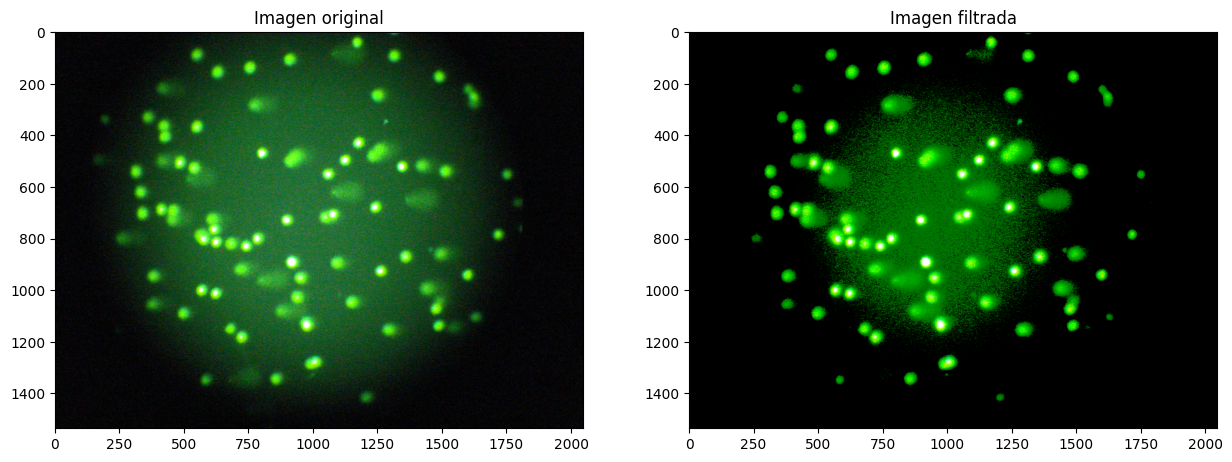

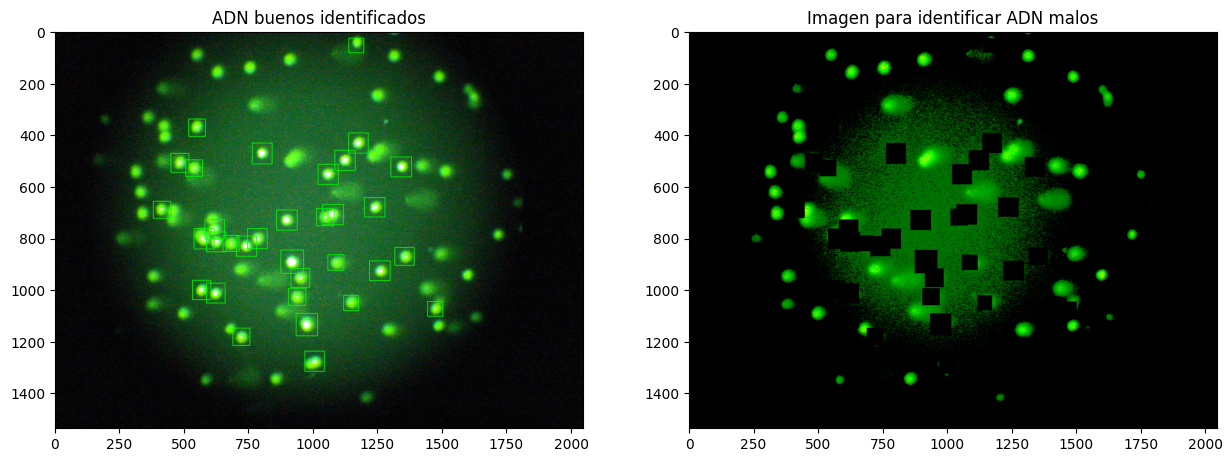

In [36]:
#Se carga la imagen de entrada
image = cv2.imread('DSC09607.JPG')

#Se crea una copia de la imagen original a partir de la que se harán los recortes
image_original=image.copy()
result_image_ADN = image.copy() #se crea una copia para mostrar la imagen original con los ADN buenos identificados
result_image_comet = image.copy() #se crea una copia que contiene la imagen original excluyendo los ADN identificados
result_image_comet2 = image.copy() #se crea una copia para mostrar la imagen original con los ADN malos identificados
plt.figure(figsize=(15, 6))
plt.figure(1),
plt.subplot(1,2,1)
plt.imshow(image)  # Muestra la primera imagen
plt.title('Imagen original')
#Se genera una máscara para filtrar valores inferiores a 100 para reducir el ruido
mask = (image < 100).astype(np.uint8)
image = image * (1 - mask)
plt.subplot(1,2,2)
plt.imshow(image)  # Muestra la primera imagen
plt.title('Imagen filtrada')

# Convertir la imagen a escala de grises
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar umbralización para separar los puntos de fondo
_, thresholded = cv2.threshold(gray, 170, 255, cv2.THRESH_BINARY)

#se una operación de erosión para eliminar pequeñas regiones de la imagen que no corresponden al ADN
kernel = np.ones((3, 3), np.uint8)
erosion = cv2.erode(thresholded, kernel, iterations=1)

# Aplicar una operación de dilatación para unir regiones del ADN que puedan haber quedado separadas
thresholded = cv2.dilate(erosion, kernel, iterations=2)

# Encontrar contornos en la imagen umbralizada
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Inicializar una lista para almacenar las subimágenes
subimages = []

# Margen alrededor de los puntos (ajustable según sea necesario)
margen = 25

# Iterar a través de los contornos
for contour in contours:
    # Obtener el rectángulo delimitador del contorno con margen
    x, y, w, h=cv2.boundingRect(contour)
    x-=margen
    y-=margen
    w+=2 * margen
    h+=2 * margen

    # Asegurarse de que las coordenadas sean positivas
    x=max(0, x)
    y=max(0, y)

    # Extraer la subimagen del punto (ADN)
    subimage=image[y:y+h, x:x+w]

    # Dibujar un rectángulo alrededor del punto en la copia de la imagen
    cv2.rectangle(result_image_ADN, (x, y), (x + w, y + h), (0, 255, 0), 2)

    result_image_comet[y:y+h, x:x+w] = 0

    # Agregar la subimagen a la lista de subimágenes
    subimages.append(subimage)

result_image_comet=result_image_comet * (1 - mask)

#Cantidad de ADN buenos encontrados
cantidad_puntos_adn=len(subimages)

# Mostrar la imagen con los contornos dibujados
plt.figure(figsize=(15, 6))
plt.figure(2),
plt.subplot(1,2,1)
plt.imshow(result_image_ADN)
plt.title('ADN buenos identificados')
plt.subplot(1,2,2)
plt.imshow(result_image_comet)
plt.title('Imagen para identificar ADN malos')

# Mostrar la cantidad de puntos (ADN) encontrados
print(f"Cantidad de puntos (ADN) encontrados: {cantidad_puntos_adn}")

# Guardar las subimágenes si es necesario
for i, subimage in enumerate(subimages):
    cv2.imwrite(f'subimagen1_{i}_b.jpg', subimage)


Cantidad de cometas (ADN) encontrados: 43


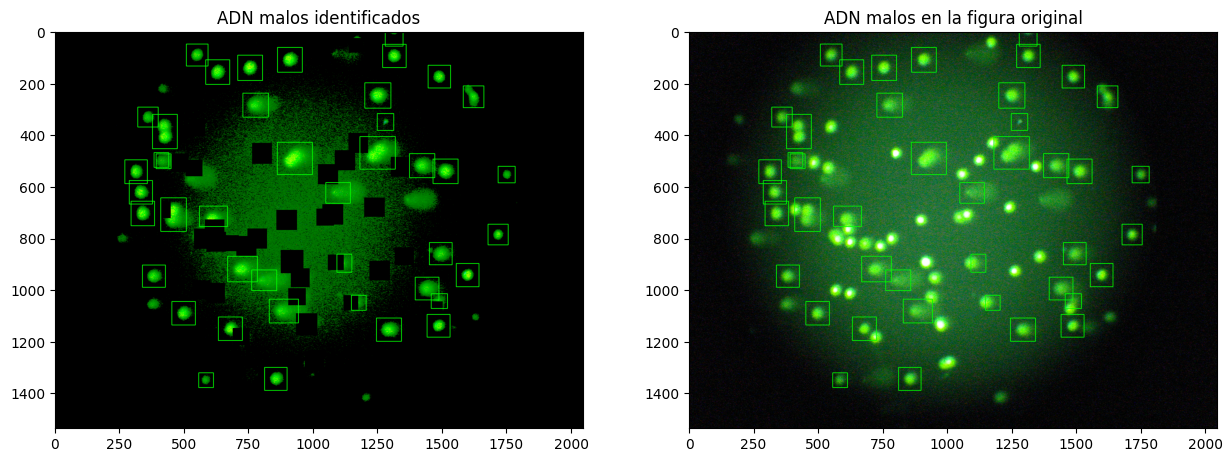

In [37]:
# Convertir la imagen a escala de grises
gray=cv2.cvtColor(result_image_comet, cv2.COLOR_BGR2GRAY)

# Aplicar umbralización para separar los puntos de fondo
_, thresholded=cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

# Aplicar una operación de erosión para eliminar pequeñas regiones de la imagen que no corresponden al ADN
kernel=np.ones((3, 3), np.uint8)
erosion=cv2.erode(thresholded, kernel, iterations=1)

# Aplicar una operación de dilatación para unir regiones del ADN que puedan haber quedado separadas
thresholded=cv2.dilate(erosion, kernel, iterations=3)

# Encontrar contornos en la imagen umbralizada
contours, _=cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Inicializar una lista para almacenar las subimágenes
subimages=[]

# Margen alrededor de los puntos (ajustable según sea necesario)
margen=25

# Iterar a través de los contornos
for contour in contours:
    # Obtener el rectángulo delimitador del contorno con margen
    x, y, w, h=cv2.boundingRect(contour)
    x-=margen
    y-=margen
    w+=2 * margen
    h+=2 * margen

    # Asegurarse de que las coordenadas sean positivas
    x=max(0, x)
    y=max(0, y)

    # Extraer la subimagen del punto (ADN)
    subimage=image[y:y+h, x:x+w]

    # Dibujar un rectángulo alrededor del punto en la copia de la imagen
    cv2.rectangle(result_image_comet, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.rectangle(result_image_comet2, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Agregar la subimagen a la lista de subimágenes
    subimages.append(subimage)

# Contar los puntos (ADN)
cantidad_puntos_adn=len(subimages)

# Mostrar la imagen con los contornos dibujados
plt.figure(figsize=(15, 6))
plt.figure(1),
plt.subplot(1,2,1)
plt.imshow(result_image_comet)
plt.title('ADN malos identificados')
plt.subplot(1,2,2)
plt.imshow(result_image_comet2)
plt.title('ADN malos en la figura original')

# Mostrar la cantidad de puntos (ADN) encontrados
print(f"Cantidad de cometas (ADN) encontrados: {cantidad_puntos_adn}")

# Guardar las subimágenes si es necesario
for i, subimage in enumerate(subimages):
    cv2.imwrite(f'subimagen1_{i}_m.jpg', subimage)

#Desarrollo del modelo CNN

In [52]:
#Ruta de las imágenes
image_directory="/content/"

#Lista para almacenar las rutas de las imágenes y sus etiquetas
image_paths=[]
labels=[]

#Rutas de las imágenes
for filename in os.listdir(image_directory):
    if filename.endswith("_b.jpg"):
        image_paths.append(os.path.join(image_directory, filename))
        labels.append(0)  # ADN bueno
    elif filename.endswith("_m.jpg"):
        image_paths.append(os.path.join(image_directory, filename))
        labels.append(1)  # ADN malo

#Función para cargar las imagenes obtenidas en la sección "Extracción de las imágenes ADN"
def load_images(image_paths, target_size):
    images=[]
    for path in image_paths:
        img=Image.open(path)
        img=img.resize(target_size)#Redimensionamiento para uniformizar la entrada en el modelo CNN
        img=transforms.ToTensor()(img)
        images.append(img)
    return images

target_size=(128, 128)  #Valor del redimensionamiento

images=load_images(image_paths, target_size)

#División de datos a partir de las imagenes obtenidas por de la sección "Extracción de las imágenes ADN"
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

In [58]:
#Extracción de las imágenes y labels
class CustomDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images=images
        self.labels=labels
        self.transform=transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image=self.images[idx]
        label=self.labels[idx]
        if self.transform:
            image=self.transform(image)
        return image, label

#Transformaciones para las imágenes
transform=transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

#Datasets y dataloaders
train_dataset=CustomDataset(train_images, train_labels, transform=transform)
test_dataset=CustomDataset(test_images, test_labels, transform=transform)

train_loader=DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader=DataLoader(test_dataset, batch_size=32, shuffle=False)

#Creación del modelo CNN
class CNNModel(nn.Module):
    def __init__(self, num_classes):
        super(CNNModel, self).__init__()
        self.conv1=nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.pool=nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1=nn.Linear(64 * 64 * 64, num_classes)

    def forward(self, x):
        x=self.pool(nn.functional.relu(self.conv1(x)))
        x=x.view(x.size(0), -1)
        x=self.fc1(x)
        return x

#Modelo creado con 2 posibles clases "ADN bueno" y "ADN malo"
model=CNNModel(num_classes=2)

#Función de pérdida
criterion=nn.CrossEntropyLoss()
#Función de optimización
optimizer=optim.Adam(model.parameters(), lr=0.001)

#Entrenamiento del modelo
num_epochs=10
model.train()
for epoch in range(num_epochs):
    running_loss=0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs=model(images)
        loss=criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # muestra estadísticas
        running_loss+=loss.item()
    #Pérdida por época
    print(f'Epoch: {epoch+1}, loss: {running_loss/2000:.3f}')

#Evaluación del modelo en el conjunto de prueba
model.eval()
predictions=[]
true_labels=[]

with torch.no_grad():
    for images, labels in test_loader:
        outputs=model(images)
        _, predicted=torch.max(outputs.data, 1)
        predictions.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

accuracy = accuracy_score(true_labels, predictions)
#Resultados en el conjunto de prueba
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')
print("Valores de la predicción:"predictions,"\n Valores reales",true_labels)

Epoch: 1, loss: 0.024
Epoch: 2, loss: 0.004
Epoch: 3, loss: 0.006
Epoch: 4, loss: 0.005
Epoch: 5, loss: 0.001
Epoch: 6, loss: 0.001
Epoch: 7, loss: 0.001
Epoch: 8, loss: 0.002
Epoch: 9, loss: 0.001
Epoch: 10, loss: 0.000
Precisión en el conjunto de prueba: 100.00%
[0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1] igual [0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1]
